(128, 16)

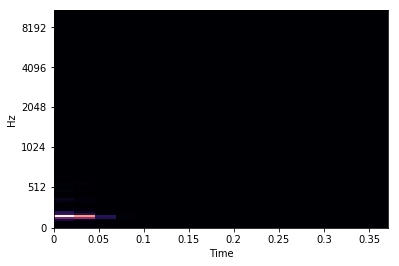

In [27]:
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, \
                         Flatten, MaxPooling2D
from keras.models import Sequential
import librosa
import librosa.display
import numpy as np
import random

y, sr = librosa.load('./Dataset/Snare/Snare3.wav')
ps = librosa.feature.melspectrogram(y=y, sr=sr)
librosa.display.specshow(ps, y_axis='mel', x_axis='time')
ps.shape


(128, 26)

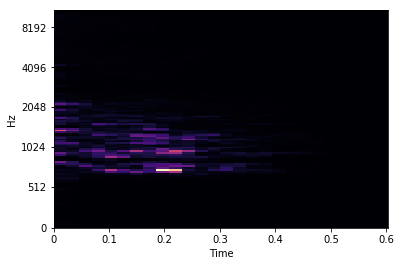

In [28]:
y1, sr1 = librosa.load('./Dataset/Clap/Clap67.wav')
ps1 = librosa.feature.melspectrogram(y=y1, sr=sr1)
librosa.display.specshow(ps1, y_axis='mel', x_axis='time')
ps1.shape


In [29]:
D = []
for i in range(1, 1219):
    y, sr = librosa.load('./Dataset/Snare/Snare' + str(i) + '.wav')
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    D.append( (ps, 1) )

print (D)

[(array([[1.15482331e+00, 3.97334814e-01, 1.23135236e-02, 3.29495795e-03],
       [2.37694518e+00, 8.51441099e-01, 1.89452672e-02, 2.51683106e-03],
       [2.85186201e-01, 1.43247026e-01, 1.80149489e-02, 4.93140470e-03],
       [2.84633297e-01, 3.69634774e-01, 3.55162848e-01, 8.36191186e-02],
       [5.15947965e+00, 8.44622576e+00, 6.90165166e+00, 1.21900603e+00],
       [4.28294921e+00, 8.01628723e+00, 3.77254768e+00, 4.38557845e-01],
       [1.54100188e+00, 9.50295049e-01, 1.08219823e-01, 4.54949312e-03],
       [1.73630513e+01, 6.57401262e+00, 4.70308131e-01, 1.25762779e-02],
       [1.20990605e+02, 5.13978757e+01, 7.15683073e+00, 3.99872115e-01],
       [7.72532677e+02, 5.76485977e+02, 8.94476447e+01, 1.96564201e+00],
       [1.12022223e+03, 4.34155631e+02, 3.35216262e+01, 9.14568936e-01],
       [1.24101734e+02, 3.32338770e+01, 4.40249638e-01, 4.43630504e-02],
       [1.22287035e+01, 5.45230050e+00, 1.39972314e-01, 2.25993939e-03],
       [1.12476445e+00, 5.82355674e-01, 1.3814595

In [30]:
Ys = []
for i in range(1, 1219):
    y1, sr1 = librosa.load('./Dataset/Kick/Kick' + str(i) + '.wav', duration = 2.97)
    Ys.append((y1,sr1))

In [31]:
for i in range(0, 1218):   
  print (Ys[i][0].shape)


(32768,)
(3656,)
(22050,)
(9450,)
(9450,)
(9450,)
(9450,)
(1694,)
(2190,)
(65449,)
(6076,)
(1687,)
(5513,)
(11025,)
(11025,)
(11025,)
(11025,)
(11025,)
(11025,)
(11025,)
(11025,)
(11025,)
(11025,)
(5513,)
(11025,)
(11025,)
(11025,)
(11025,)
(11025,)
(11025,)
(5513,)
(5513,)
(11025,)
(11025,)
(11025,)
(11025,)
(11025,)
(9093,)
(16705,)
(11025,)
(20046,)
(7691,)
(22050,)
(14866,)
(16724,)
(11149,)
(5110,)
(14797,)
(7375,)
(3235,)
(4824,)
(6202,)
(1729,)
(14530,)
(18752,)
(4583,)
(4771,)
(4612,)
(12404,)
(12404,)
(6781,)
(5575,)
(7088,)
(5575,)
(3717,)
(6799,)
(4594,)
(3446,)
(6719,)
(4824,)
(20046,)
(10209,)
(5105,)
(14866,)
(17962,)
(12108,)
(7219,)
(7673,)
(4135,)
(4135,)
(3790,)
(4950,)
(3446,)
(6891,)
(4135,)
(7433,)
(3717,)
(14437,)
(4813,)
(16538,)
(6891,)
(2757,)
(4229,)
(12659,)
(7604,)
(18504,)
(8353,)
(22298,)
(33410,)
(6682,)
(13364,)
(3446,)
(6202,)
(7318,)
(8269,)
(55679,)
(5667,)
(4883,)
(36619,)
(38569,)
(41203,)
(3627,)
(11276,)
(4410,)
(3760,)
(60137,)
(20540,)
(2769,)
(

In [32]:
for i in range(0, 1218):
  Ys[i] = [np.pad(Ys[i][0], (0, 65489 - Ys[i][0].shape[0]), 'constant'), Ys[i][1]]
  print (np.pad(Ys[i][0], (0, 65489 - Ys[i][0].shape[0]), 'constant'))

[-1.7032469e-06  3.1276053e-05  3.0140518e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-0.00684748 -0.03136711 -0.04054694 ...  0.          0.
  0.        ]
[ 4.47378987e-08 -7.16350712e-08  1.08027834e-07 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
[0.00881404 0.01119948 0.0047997  ... 0.         0.         0.        ]
[-2.5950612e-05 -2.8520477e-05 -3.4534882e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[0.02860753 0.03580884 0.03420357 ... 0.         0.         0.        ]
[-6.5465101e-05  3.1284151e-05  1.2496313e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[0.01077167 0.0375834  0.07381901 ... 0.         0.         0.        ]
[0.04287717 0.10654584 0.14325455 ... 0.         0.         0.        ]
[-8.5158587e-07  1.0989880e-06 -1.5163895e-06 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-0.0090316  -0.02855538 -0.05237808 ...  0.          0.
  0.        ]
[0.00737062 0.01598858 0.02320912 ... 0.         0.         0.        ]
[ 0.000

[0. 0. 0. ... 0. 0. 0.]
[-5.4263056e-09  7.0621105e-09 -8.9122612e-09 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[0. 0. 0. ... 0. 0. 0.]
[ 0.05206117 -0.1589697  -0.1759657  ...  0.          0.
  0.        ]
[ 0.02134172  0.09223025 -0.05230815 ...  0.          0.
  0.        ]
[-0.00032464 -0.04494558  0.01811833 ...  0.          0.
  0.        ]
[ 0.00195141  0.01867389 -0.01826565 ...  0.          0.
  0.        ]
[-0.0001209  -0.00025754 -0.00051371 ...  0.          0.
  0.        ]
[ 0.00025301 -0.0003647   0.00040962 ...  0.          0.
  0.        ]
[-0.00331602  0.00446561 -0.00607383 ...  0.          0.
  0.        ]
[-0.00018406  0.00022516 -0.00041545 ...  0.          0.
  0.        ]
[-0.00153166  0.00196339  0.00232579 ...  0.          0.
  0.        ]
[-0.00800769  0.00946661 -0.00308252 ...  0.          0.
  0.        ]
[-0.01018328  0.01373285 -0.01056365 ...  0.          0.
  0.        ]
[ 6.7008405e-05 -2.7652679e-04  3.9842405e-04 ...  0.0000000e+00
  0.00000

[-0.00131218 -0.00202706 -0.00185114 ...  0.          0.
  0.        ]
[ 0.00411763 -0.00962834  0.01830365 ...  0.          0.
  0.        ]
[0.05380265 0.00051263 0.03608615 ... 0.         0.         0.        ]
[ 0.00958777 -0.00624199 -0.01161306 ...  0.          0.
  0.        ]
[-0.00077913 -0.00505295 -0.0060094  ...  0.          0.
  0.        ]
[ 0.00826404 -0.02062495  0.09746248 ...  0.          0.
  0.        ]
[ 0.0011343  -0.00199123 -0.00400304 ...  0.          0.
  0.        ]
[-3.5905028e-05 -1.6192289e-05  1.4913148e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[0.02797119 0.01936748 0.05643687 ... 0.         0.         0.        ]
[-0.0006945  -0.00162484 -0.0001518  ...  0.          0.
  0.        ]
[-8.9804540e-05  1.2200521e-04 -1.5553184e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-3.2255608e-07 -1.9365181e-05 -4.1752788e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-1.1514464e-05 -2.5069001e-05 -1.1920258e-04 ...  0.0000000e+00
  0

[0. 0. 0. ... 0. 0. 0.]
[-1.6708247e-05  1.2730647e-04  1.2661687e-03 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-1.1730488e-06  1.0901771e-04  1.2950622e-03 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[0. 0. 0. ... 0. 0. 0.]
[-3.5143719e-05  6.8684772e-04  3.4775636e-03 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-1.2445341e-05  3.6724814e-05  8.3596789e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[-2.1107269e-05 -1.1688182e-05  2.4502294e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[9.8030854e-05 2.0293610e-03 8.1571378e-03 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00]
[0.00107049 0.00747003 0.01925816 ... 0.         0.         0.        ]
[0.00287709 0.02001156 0.0420102  ... 0.         0.         0.        ]
[-2.5897158e-05 -2.0607476e-05  1.6556098e-06 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-2.5785417e-05 -2.0653501e-05  1.66145

[0.00250882 0.00376582 0.00333214 ... 0.         0.         0.        ]
[ 5.9524364e-06 -2.7844129e-05 -2.1643007e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[2.32378238e-06 3.91226567e-05 1.03694714e-04 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[ 1.4374726e-06 -2.9395187e-06  5.2034338e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-8.4143085e-07  7.2646407e-07 -2.4822890e-07 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-5.8045185e-05 -5.6891609e-04 -1.1956816e-03 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-0.00481997 -0.00725628 -0.0066723  ...  0.          0.
  0.        ]
[-1.6816186e-06 -5.5293726e-06 -2.7872154e-06 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-4.9241748e-06 -4.2130546e-06  4.7940597e-07 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-0.00019195 -0.00776952 -0.02320428 ...  0.          0.
  0.        ]
[-5.6739384e-05 -8.1281742e-04 -1.7519473e-03 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-0.002480

[0.00659992 0.01228938 0.01438101 ... 0.         0.         0.        ]
[-0.01628026 -0.03789863 -0.04462131 ...  0.          0.
  0.        ]
[-0.05090743 -0.09730747 -0.09367811 ...  0.          0.
  0.        ]
[-0.05114833 -0.11243084 -0.12709197 ...  0.          0.
  0.        ]
[0.00354505 0.00858581 0.01159488 ... 0.         0.         0.        ]
[-0.01216569 -0.01679672 -0.01273432 ...  0.          0.
  0.        ]
[0.00696349 0.02697498 0.05211175 ... 0.         0.         0.        ]
[0.00291429 0.01837747 0.04081136 ... 0.         0.         0.        ]
[0.0239055  0.04405143 0.02899553 ... 0.         0.         0.        ]
[-0.00075221  0.04676044  0.02905229 ...  0.          0.
  0.        ]
[-0.00139499 -0.00265068 -0.00146548 ...  0.          0.
  0.        ]
[-2.9853380e-05 -4.9238370e-05  1.8172024e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-6.4202737e-05 -1.4721155e-04 -6.5128587e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[0.0363423  0.334390

[ 0.05567788 -0.19434112 -0.13084237 ...  0.          0.
  0.        ]
[ 0.05880404 -0.06040825 -0.09017562 ...  0.          0.
  0.        ]
[-0.02571522 -0.01387394 -0.0754518  ...  0.          0.
  0.        ]
[ 0.01957829  0.0986846  -0.01937813 ...  0.          0.
  0.        ]
[ 0.09956291 -0.14346345 -0.08508193 ...  0.          0.
  0.        ]
[ 0.08827339  0.12068217 -0.26249042 ...  0.          0.
  0.        ]
[-0.07494885 -0.00732646  0.05290906 ...  0.          0.
  0.        ]
[ 0.00842685  0.00553187 -0.01043519 ...  0.          0.
  0.        ]
[ 0.07781009 -0.07818538  0.35353035 ...  0.          0.
  0.        ]
[-0.00664514 -0.06550338 -0.10868646 ...  0.          0.
  0.        ]
[0.18965621 0.12222756 0.14040457 ... 0.         0.         0.        ]
[-0.0238737  -0.05358577  0.02908911 ...  0.          0.
  0.        ]
[ 0.04978458  0.0580339  -0.08036997 ...  0.          0.
  0.        ]
[-0.01184762  0.17383552  0.00468327 ...  0.          0.
  0.        ]
[ 0.0

[-6.1179321e-06 -3.4354329e-05 -4.5754743e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[ 8.859561e-07 -9.059039e-07  8.652783e-07 ...  0.000000e+00  0.000000e+00
  0.000000e+00]
[ 7.6432819e-08 -1.4148107e-07  2.3042291e-07 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[ 4.4008644e-07 -5.8346552e-07  7.8986011e-07 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-2.80288496e-05  1.09274595e-04 -2.81960645e-04 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
[-7.8657393e-08  4.5460432e-08 -6.1950165e-09 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-8.4600039e-08  1.2133385e-07 -2.0689961e-07 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-3.2365301e-06  3.4494310e-06 -3.3133988e-06 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[ 0.00030984 -0.00047068  0.00025814 ...  0.          0.
  0.        ]
[-1.9646019e-07  3.3224737e-07 -5.5840741e-07 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[ 0.00013898 -0.0001508  -0.0007555  ...  0.          0.

In [33]:
for i in range(0, 1218):   
  print (Ys[i][0].shape)

(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(

(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)
(65489,)


In [34]:
D = []
for i in range(0, 1218):   
    ps = librosa.feature.melspectrogram(y=Ys[i][0], sr=Ys[i][1])
    D.append((ps,1))

In [35]:
Ys = []
for i in range(1, 1362):
    y1, sr1 = librosa.load('./Dataset/Snare/Snare' + str(i) + '.wav', duration = 2.97)
    Ys.append((y1,sr1))
    
for i in range(0, 1361):
  Ys[i] = [np.pad(Ys[i][0], (0, 65489 - Ys[i][0].shape[0]), 'constant'), Ys[i][1]]
  print (np.pad(Ys[i][0], (0, 65489 - Ys[i][0].shape[0]), 'constant'))
    
for i in range(0, 1361):   
  ps = librosa.feature.melspectrogram(y=Ys[i][0], sr=Ys[i][1])
  D.append((ps,2))

[-0.03189505 -0.12543148 -0.23080179 ...  0.          0.
  0.        ]
[-0.16343579 -0.53522706 -0.7809882  ...  0.          0.
  0.        ]
[-0.0082423   0.00741247  0.0263637  ...  0.          0.
  0.        ]
[ 5.8795845e-08 -3.5696825e-08  4.2133133e-09 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-2.9452474e-05 -7.6666540e-05 -3.2061164e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[ 1.5801014e-04 -2.7700199e-04 -3.9762912e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-7.9185274e-06 -3.2281128e-05 -2.9715045e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-9.69953544e-06 -1.21224715e-04 -2.34183870e-04 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
[-9.7993989e-06 -1.0863454e-04 -1.8571583e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-2.4015651e-05 -2.5975838e-04 -5.2170112e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-0.00027083 -0.00053496 -0.00017713 ...  0.          0.
  0.        ]
[-0.00034082 -0.00093656 -0.000

[-0.0018728   0.00142654 -0.00319175 ...  0.          0.
  0.        ]
[-0.02776373 -0.05501908 -0.0444115  ...  0.          0.
  0.        ]
[8.99534352e-05 1.31839814e-04 1.16210525e-04 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[0.02360357 0.03977726 0.0416493  ... 0.         0.         0.        ]
[0.11933835 0.18371935 0.18579553 ... 0.         0.         0.        ]
[0.00066885 0.00017793 0.00098329 ... 0.         0.         0.        ]
[0.01419194 0.04375035 0.07700747 ... 0.         0.         0.        ]
[-0.11309219 -0.1001162  -0.04686589 ...  0.          0.
  0.        ]
[-0.00057086 -0.00085982 -0.0007688  ...  0.          0.
  0.        ]
[-0.08849804 -0.2330336  -0.16266003 ...  0.          0.
  0.        ]
[0.00566629 0.02432842 0.03320894 ... 0.         0.         0.        ]
[0.00247469 0.00384918 0.00324285 ... 0.         0.         0.        ]
[ 0.00078419 -0.00090499  0.00094338 ...  0.          0.
  0.        ]
[ 6.4313135e-06 -4.7008043e-06  3.8163831e-05

[0.29467383 0.9043707  0.7720441  ... 0.         0.         0.        ]
[0.00655383 0.17926346 0.48417845 ... 0.         0.         0.        ]
[ 0.00131715 -0.00244534  0.0085647  ...  0.          0.
  0.        ]
[0.2874976 0.8823405 0.753238  ... 0.        0.        0.       ]
[ 0.06302214 -0.10026804 -0.20270151 ...  0.          0.
  0.        ]
[-0.00284631  0.00677439 -0.0317808  ...  0.          0.
  0.        ]
[ 5.7625841e-02 -9.2310153e-02 -1.9891864e-01 ...  1.2969428e-04
  1.4858767e-04  0.0000000e+00]
[ 0.00709489  0.00942057 -0.24734358 ...  0.          0.
  0.        ]
[ 0.0004999   0.0069243  -0.00708385 ...  0.          0.
  0.        ]
[ 0.00692532  0.00919225 -0.24132288 ... -0.00069538 -0.00079346
  0.        ]
[-0.00267328 -0.06915601 -0.19890666 ...  0.          0.
  0.        ]
[ 0.02437666  0.02353954 -0.10372183 ...  0.          0.
  0.        ]
[0.26365688 0.79666114 0.7442239  ... 0.         0.         0.        ]
[-0.02133222 -0.0165981   0.01113002 ...  0. 

[2.9044420e-06 2.3636207e-05 4.2659492e-04 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00]
[-0.00327931  0.01756079  0.19291982 ...  0.          0.
  0.        ]
[9.3814466e-05 2.1153310e-04 1.8782703e-04 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00]
[0.00023358 0.00163416 0.00272468 ... 0.         0.         0.        ]
[-0.00250534 -0.00360808 -0.0018876  ...  0.          0.
  0.        ]
[-0.01384241  0.02317422  0.03124237 ...  0.          0.
  0.        ]
[-0.01256862 -0.04506913 -0.05402635 ...  0.          0.
  0.        ]
[0.00307528 0.00566347 0.00303234 ... 0.         0.         0.        ]
[0.01150518 0.01731738 0.00922322 ... 0.         0.         0.        ]
[ 0.00104878  0.00223409 -0.00067092 ...  0.          0.
  0.        ]
[0.0007779  0.00199923 0.00829152 ... 0.         0.         0.        ]
[ 0.00297263 -0.02185885 -0.10384481 ...  0.          0.
  0.        ]
[-0.00083869  0.00208041 -0.00113336 ...  0.          0.
  0.        ]
[0.03824005 0.1552755  0.10779803

[-1.9289962e-05 -5.8875019e-05  2.1885292e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[8.9595036e-05 1.3231509e-04 1.1538779e-04 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00]
[-2.7696748e-05 -2.9441859e-05 -3.8147620e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-0.00984552  0.00924429  0.01751753 ...  0.          0.
  0.        ]
[-2.4762194e-04 -8.2187893e-05  7.7323650e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-0.00011244 -0.0001648  -0.00014526 ...  0.          0.
  0.        ]
[-0.00012369 -0.00018128 -0.00015979 ...  0.          0.
  0.        ]
[-2.3760683e-06  2.0995051e-06 -1.6237044e-06 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[ 2.0485993e-05 -7.3414434e-05  2.4771818e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-1.4019774e-05 -1.6154359e-05 -1.4990995e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[1.3598826e-06 3.9141150e-06 4.0427014e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00]
[-1.7227519e-06  1.6459

In [36]:
Ys = []
for i in range(1, 583):
    y1, sr1 = librosa.load('./Dataset/Clap/Clap' + str(i) + '.wav', duration = 2.97)
    Ys.append((y1,sr1))
    
for i in range(0, 582):
  Ys[i] = [np.pad(Ys[i][0], (0, 65489 - Ys[i][0].shape[0]), 'constant'), Ys[i][1]]
  print (np.pad(Ys[i][0], (0, 65489 - Ys[i][0].shape[0]), 'constant'))
    
for i in range(0, 582):   
  ps = librosa.feature.melspectrogram(y=Ys[i][0], sr=Ys[i][1])
  D.append((ps,3))

[-0.01815923  0.00440049  0.01399977 ...  0.          0.
  0.        ]
[ 0.01228111  0.00062001 -0.01181463 ...  0.          0.
  0.        ]
[ 0.0083633  -0.05463043  0.09301941 ...  0.          0.
  0.        ]
[-0.00291128  0.05426893 -0.02082437 ...  0.          0.
  0.        ]
[ 0.01962277  0.2574319  -0.06849851 ...  0.          0.
  0.        ]
[-0.00125942 -0.00645341 -0.00054323 ...  0.          0.
  0.        ]
[-0.10357036 -0.00493811  0.00502534 ...  0.          0.
  0.        ]
[-0.04684881 -0.07171944 -0.01843659 ...  0.          0.
  0.        ]
[ 4.9659847e-03 -2.1118836e-02  6.1712824e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[ 0.00372083 -0.00428023 -0.00894572 ...  0.          0.
  0.        ]
[-0.19286561 -0.2499918   0.2164979  ...  0.          0.
  0.        ]
[ 0.08899013  0.14413169 -0.01320805 ...  0.          0.
  0.        ]
[-0.00056808 -0.00409458 -0.00129087 ...  0.          0.
  0.        ]
[-0.02290527 -0.05291662 -0.05465686 ...  0.       

[2.0242591e-05 3.2137312e-05 4.6100016e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00]
[-1.7018170e-05 -1.1667635e-05 -1.9211446e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-1.1363796e-05 -2.4238037e-05 -2.1626809e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-1.0324024e-05 -1.8195531e-05 -1.7724290e-06 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-1.8358895e-05 -9.7911279e-06 -1.0722210e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-4.0540781e-05 -6.2930596e-04 -1.3060851e-03 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-3.798993e-05 -4.877124e-04 -9.983819e-04 ...  0.000000e+00  0.000000e+00
  0.000000e+00]
[-6.7399465e-06 -3.7370162e-04 -9.3484588e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[ 0.00062419 -0.00072428  0.00064137 ...  0.          0.
  0.        ]
[-0.00510494 -0.00043716  0.00160315 ...  0.          0.
  0.        ]
[-0.00661694 -0.00341492 -0.13016976 ...  0.          0.
  0.        ]
[-0.0036862  -0.0079746

In [37]:
Ys = []
for i in range(1, 815):
    y1, sr1 = librosa.load('./Dataset/HH/HH' + str(i) + '.wav', duration = 2.97)
    Ys.append((y1,sr1))
    
for i in range(0, 814):
  Ys[i] = [np.pad(Ys[i][0], (0, 65489 - Ys[i][0].shape[0]), 'constant'), Ys[i][1]]
  print (np.pad(Ys[i][0], (0, 65489 - Ys[i][0].shape[0]), 'constant'))
    
for i in range(0, 814):   
  ps = librosa.feature.melspectrogram(y=Ys[i][0], sr=Ys[i][1])
  D.append((ps,4))

[-0.14031632  0.06758794  0.0843765  ...  0.          0.
  0.        ]
[ 0.04302013  0.00061694 -0.03758805 ...  0.          0.
  0.        ]
[ 0.00314584  0.00247115 -0.00180378 ...  0.          0.
  0.        ]
[-0.06812371  0.01060169  0.20314944 ...  0.          0.
  0.        ]
[ 0.00246209  0.03072879 -0.0363856  ...  0.          0.
  0.        ]
[ 0.01403328  0.00887437 -0.02025627 ...  0.          0.
  0.        ]
[ 0.00203141 -0.00259827  0.00309203 ...  0.          0.
  0.        ]
[ 0.0134985  -0.00683594  0.14916605 ...  0.          0.
  0.        ]
[-0.00223921  0.00268893 -0.00313569 ...  0.          0.
  0.        ]
[ 0.01387966  0.00803666 -0.00059632 ...  0.          0.
  0.        ]
[ 0.12450853 -0.07783241 -0.01480804 ...  0.          0.
  0.        ]
[-0.0195832   0.1501387  -0.10337249 ...  0.          0.
  0.        ]
[ 0.14385818 -0.11806457 -0.02043615 ...  0.          0.
  0.        ]
[-0.03377705  0.17336664 -0.0989617  ...  0.          0.
  0.        ]
[ 0.14

[-2.1903239e-05 -3.3049299e-05 -2.9044812e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[ 0.00150867 -0.00120493  0.00144115 ...  0.          0.
  0.        ]
[-0.00276899  0.00335096  0.00147782 ...  0.          0.
  0.        ]
[-0.00045335  0.00152765  0.00996411 ...  0.          0.
  0.        ]
[-0.03593723  0.03840344 -0.03281416 ...  0.          0.
  0.        ]
[-0.00028033  0.00034024  0.00640836 ...  0.          0.
  0.        ]
[-1.6191367e-04  6.2316809e-05  2.7186975e-03 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-2.1903239e-05 -3.3049299e-05 -2.9044812e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-2.1903239e-05 -3.3049299e-05 -2.9044812e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-2.1903239e-05 -3.3049299e-05 -2.9044812e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[ 0.00036659 -0.00207706 -0.01265338 ...  0.          0.
  0.        ]
[-0.00018566 -0.00272236 -0.00882459 ...  0.          0.
  0.        ]
[-3.0480296e-05 -5

[-5.9772719e-05  7.8390178e-05  4.3982023e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-4.7699643e-05 -8.7626286e-05 -1.3074822e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[ 3.3372613e-05 -3.5193381e-05  1.7684886e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-1.0866019e-05  2.1130770e-06  1.5230423e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-8.5029744e-05  1.7844639e-05 -5.7007512e-04 ... -5.0323265e-06
  1.5950588e-06  0.0000000e+00]
[0.03475625 0.04400524 0.0527001  ... 0.         0.         0.        ]
[-0.00526565  0.00875537 -0.04959845 ...  0.          0.
  0.        ]
[ 3.255384e-05 -3.519075e-04  2.535188e-04 ...  0.000000e+00  0.000000e+00
  0.000000e+00]
[-0.00014766  0.00016828 -0.00018559 ...  0.          0.
  0.        ]
[ 8.0890504e-06 -1.6646227e-05  2.2539021e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[ 0.00036396 -0.00347141 -0.00148683 ...  0.          0.
  0.        ]
[ 1.6360852e-06 -2.0318717e-05 -1.2089701e

In [38]:
dataset = D
random.shuffle(dataset)

In [39]:
dataset

[(array([[7.36525743e-04, 3.38988188e-04, 1.27701888e-05, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [3.16893988e-04, 1.33185262e-04, 2.51164162e-06, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [2.45100966e-04, 6.53050920e-05, 1.60726251e-06, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [8.20043021e-01, 3.89599541e-01, 3.12788328e-02, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [2.78048927e-01, 1.22549140e-01, 8.33572581e-03, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [7.10543883e-03, 4.15744442e-03, 4.77299067e-04, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]), 4),
 (array([[3.21962548e-04, 2.12916776e-04, 1.61196417e-05, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [1.25019261e-04, 7.13394087e-05, 1.68911888e-05, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
    

In [40]:
train = dataset[:3700]
test = dataset[3700:]

X_train, y_train = zip(*train)
X_test, y_test = zip(*test)

In [42]:
# Изменение размерности для входа СНН
X_train = np.array([x.reshape( (128, 128, 1) ) for x in X_train])
X_test = np.array([x.reshape( (128, 128, 1) ) for x in X_test])

# One-Hot encoding for classes
y_train = np.array(keras.utils.to_categorical(y_train, 5))
y_test = np.array(keras.utils.to_categorical(y_test, 5))

In [45]:
model = Sequential()
input_shape=(128, 128, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(5))
model.add(Activation('softmax'))

In [ ]:
model.compile(
	optimizer="Adam",
	loss="categorical_crossentropy",
	metrics=['accuracy'])

model.fit(
	x=X_train, 
	y=y_train,
    epochs=12,
    batch_size=128,
    validation_data= (X_test, y_test))

score = model.evaluate(
	x=X_test,
	y=y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 3700 samples, validate on 275 samples
Epoch 1/12
3700/3700 [==============================] - 33s 9ms/step - loss: 1.0948 - acc: 0.6405 - val_loss: 0.5214 - val_acc: 0.8836
Epoch 2/12
3700/3700 [==============================] - 33s 9ms/step - loss: 0.6551 - acc: 0.7849 - val_loss: 0.4449 - val_acc: 0.8509
Epoch 3/12
3700/3700 [==============================] - 33s 9ms/step - loss: 0.5881 - acc: 0.8130 - val_loss: 0.4485 - val_acc: 0.8836
Epoch 4/12
3700/3700 [==============================] - 34s 9ms/step - loss: 0.5231 - acc: 0.8278 - val_loss: 0.3823 - val_acc: 0.8945
Epoch 5/12
3700/3700 [==============================] - 38s 10ms/step - loss: 0.4893 - acc: 0.8416 - val_loss: 0.3691 - val_acc: 0.8909
Epoch 6/12
3700/3700 [==============================] - 34s 9ms/step - loss: 0.4728 - acc: 0.8430 - val_loss: 0.3461 - val_acc: 0.8945
Epoch 7/12
3700/3700 [==============================] - 33s 9ms/step - loss: 0.4274 - acc: 0.8632 - val_loss: 0.3094 - val_acc: 0.9018
Epoch 8